In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,8:56 AM,9:00 AM,7:45 AM,7:45 AM.1,8:05 AM,7:45 AM.2
0,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
1,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
2,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
3,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
4,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM


In [6]:
arrival_times = np.array(df).reshape(-1)

In [7]:
arrival_times

array(['8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM', '8:45 AM', '8:20 AM',
       '8:45 AM', '8:20 AM', '8:05 AM', '8:00 AM', '8:05 AM', '8:00 AM',
       '8:40 AM', '8:40 AM', '8:40 AM', '8:25 AM', '8:40 AM', '8:40 AM',
       '8:55 AM', '8:50 AM', '8:55 AM', '8:10 AM', '8:15 AM', '8:05 AM',
       '8:45 AM', '8:45 AM', '8:45 AM', '8:40 AM', '8:30 AM', '8:40 AM',
       '8:45 AM', '8:54 AM', '8:38 AM', '8:40 AM', '8:32 AM', '8:41 AM',
       'absent', '11:00 AM', '8:35 AM', '8:15 AM', '8:10 AM', '8:10 AM',
       '8:39 AM', '8:13 AM', '8:15 AM', '8:12 AM', '8:10 AM', '8:00 AM',
       '9:00 AM', '8:50 AM', '8:50 AM', '8:50 AM', '8:40 AM', '8:45 AM',
       '8:40 AM', '8:50 AM', '8:40 AM', '8:34 AM', '8:20 AM', '8:30 AM',
       '8:15 AM', '8:30 AM', '8:13 AM', '8:30 AM', '7:45 AM', '8:40 AM',
       '8:45 AM', '8:55 AM', '8:45 AM', '8:45 AM', '8:00 AM', '8:45 AM',
       '8:45 AM', '8:45 AM', '8:05 AM', '8:00 AM', '8:00 AM', '8:00 AM',
       '8:45 AM', '8:45 AM', '9:00 AM', '9:00 AM', 

In [16]:
#x = pd.Timestamp(arrival_times[0])
mins_from_9am = [(pd.Timestamp(x) - pd.Timestamp('9:00 am')).total_seconds() / 60 for x in arrival_times if x != 'absent']
    

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


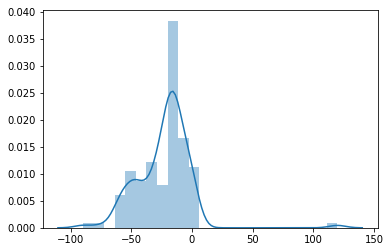

In [18]:
sns.distplot(mins_from_9am)

In [26]:
#stats.beta.rvs(mins_from_9am)


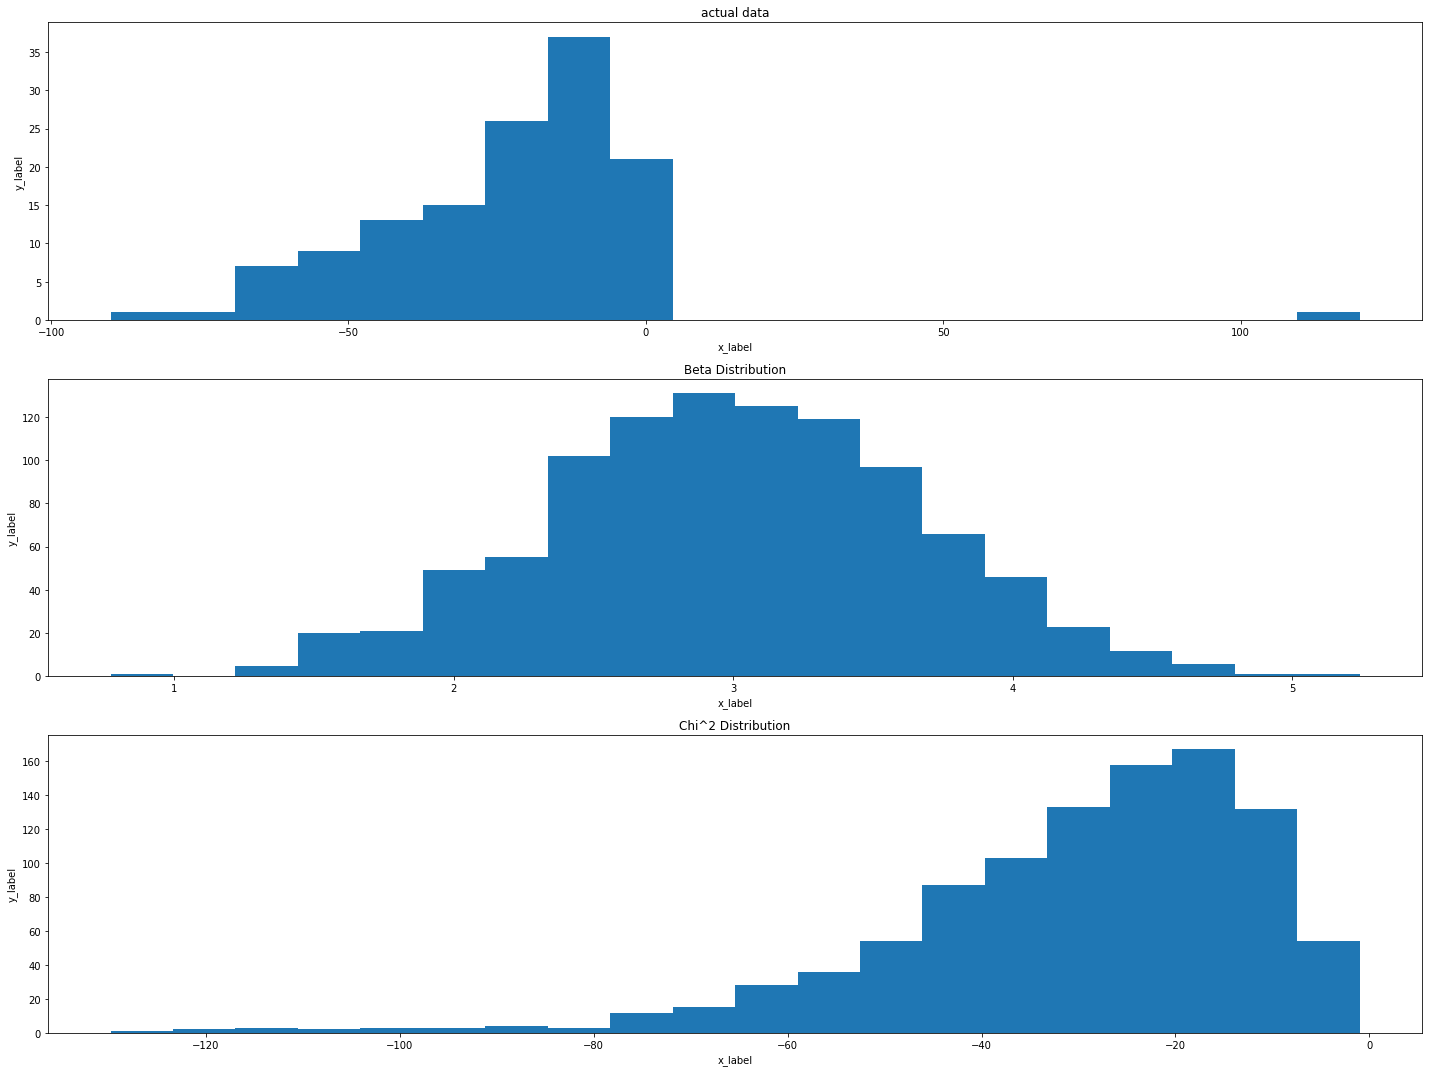

In [51]:
from scipy import stats

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

ax = axs[0]
ax.hist(mins_from_9am, bins=20)
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')
ax.set_title("actual data")

# Create some fake data with a beta distribution
beta_dist = stats.beta(10, 10, loc=0, scale=6)
fake_y = beta_dist.rvs(1000)  

# Plot the data from the beta distribution
ax = axs[1]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')
ax.set_title("Beta Distribution")

# # Create some fake data with an exponential distribution
# exponential_dist = stats.expon(loc=0, scale=1)
# fake_y = exponential_dist.rvs(1000)  

# # Plot the data from the exponential distribution
# ax = axs[1]
# ax.hist(fake_y, bins=20)  # Let's try something in between
# ax.set_xlabel('x_label')
# ax.set_ylabel('y_label')
# ax.set_title("Expenential Distribution")

# Create some fake data with an chi^2 distribution
chi2_dist = stats.chi2(5, loc=0, scale=6)
fake_y = -chi2_dist.rvs(1000)  

# Plot the data from the chi^2 distribution
ax = axs[2]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')
ax.set_title("Chi^2 Distribution")

# Show the plots
plt.tight_layout()
plt.show()